# Predictive analysis of Bank Marketing

#### Problem Statement
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

#### What to achieve?
The classification goal is to predict if the client will subscribe a term deposit (variable y).

#### Data Contains information in following format:

### Categorical Variable :

* Marital - (Married , Single , Divorced)",
* Job - (Management,BlueCollar,Technician,entrepreneur,retired,admin.,services,selfemployed,housemaid,student,unemployed,unknown)
* Contact - (Telephone,Cellular,Unknown)
* Education - (Primary,Secondary,Tertiary,Unknown)
* Month - (Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec)
* Poutcome - (Success,Failure,Other,Unknown)
* Housing - (Yes/No)
* Loan - (Yes/No)
* Default - (Yes/No)

### Numerical Variable:

* Age
* Balance
* Day
* Duration
* Campaign
* Pdays
* Previous

#### Class
* deposit - (Yes/No)

In [2]:
#Importing required libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
# from sklearn.cross_validation import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
#Importing and displaying data
data = pd.read_csv("bank_marketing/bank.csv", delimiter=";",header='infer')
data.head()

NameError: name 'pd' is not defined

In [5]:
#4521 rows and 17 features
data.shape

(4521, 17)

In [6]:
#datatypes of the columns
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Since the dtype contains types other than int, floot; we need to convert those column values into proper format in order to fit the data in model.

In [7]:
#Converting object type data into numeric type using One-Hot encoding method which is
#majorly used for XGBoost (for better accuracy) [Applicable only for non numeric categorical features]
data_new = pd.get_dummies(data, columns=['job','marital',
                                         'education','default',
                                         'housing','loan',
                                         'contact','month',
                                         'poutcome'])
#pd is instance of pandas. Using get_dummies method we can directly convert any type of data into One-Hot encoded format.

In [8]:
#Since y is a class variable we will have to convert it into binary format. (Since 2 unique class values)
data_new.y.replace(('yes', 'no'), (1, 0), inplace=True)

In [9]:
#Checking types of all the columns converted
data_new.dtypes

age                    int64
balance                int64
day                    int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
y                      int64
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
marital_divorced       uint8
marital_married        uint8
marital_single         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
default_no             uint8
default_yes            uint8
housing_no             uint8
housing_yes            uint8
loan_no                uint8
loan_yes               uint8
contact_cellular       uint8
contact_teleph

In [10]:
#Our New dataframe ready for XGBoost
data_new.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [11]:
#Spliting data as X -> features and y -> class variable
data_y = pd.DataFrame(data_new['y'])
data_X = data_new.drop(['y'], axis=1)
print(data_X.columns)
print(data_y.columns)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')
Index(['y'], dtype='object')


In [12]:
#Dividing records in training and testing sets along with its shape (rows, cols)
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3, random_state=2, stratify=data_y)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(3164, 51)
(1357, 51)
(3164, 1)
(1357, 1)


In [14]:
!pip install xgboost

     |████████████████████████████████| 1.3 MB 1.3 MB/s eta 0:00:01
You should consider upgrading via the '/Users/avivisrael/.virtualenvs/FPR_FNR_TRADEOFF/bin/python -m pip install --upgrade pip' command.


In [16]:
# XGBoost Library (libxgboost.dylib) could not be loaded.
# Likely causes:
#   * OpenMP runtime is not installed
#     - vcomp140.dll or libgomp-1.dll for Windows
#     - libomp.dylib for Mac OSX
#     - libgomp.so for Linux and other UNIX-like OSes
#     Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

#   * You are running 32-bit Python on a 64-bit OS
!brew install libomp

==> Downloading https://homebrew.bintray.com/bottles/libomp-11.0.1.big_sur.bottl
-=O=-           #     #    #     #                                            
curl: (22) The requested URL returned error: 502 Bad Gateway
Error: Failed to download resource "libomp"
Download failed: https://homebrew.bintray.com/bottles/libomp-11.0.1.big_sur.bottle.tar.gz
==> Downloading https://raw.githubusercontent.com/Homebrew/formula-patches/7e2ee
######################################################################## 100.0%
==> Downloading https://github.com/llvm/llvm-project/releases/download/llvmorg-1
==> Downloading from https://objects.githubusercontent.com/github-production-rel
######################################################################## 100.0%
==> Patching
==> Applying arm.patch
patching file runtime/src/z_Linux_asm.S
==> cmake . -DLIBOMP_INSTALL_ALIASES=OFF
==> make install
==> cmake . -DLIBOMP_ENABLE_SHARED=OFF -DLIBOMP_INSTALL_ALIASES=OFF
==> make install
🍺  /usr/local/Cellar/li

In [17]:
#Create an XGB classifier and train it on 70% of the data set.
from sklearn import svm
from xgboost import XGBClassifier
clf = XGBClassifier()
clf

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, scale_pos_weight=None,
              subsample=None, tree_method=None, use_label_encoder=True,
              validate_parameters=None, verbosity=None)

In [18]:
clf.fit(X_train, y_train)

/Users/avivisrael/.virtualenvs/FPR_FNR_TRADEOFF/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/avivisrael/.virtualenvs/FPR_FNR_TRADEOFF/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/avivisrael/.virtualenvs/FPR_FNR_TRADEOFF/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

[20:05:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=True, validate_parameters=1, verbosity=None)

In [19]:
y_pred = clf.predict(X_test)

In [20]:
#classification accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.8975681650700074


**Using xgb Library**

In [21]:
import xgboost as xgb
# X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3, random_state=2, stratify=data_y)


In [22]:
X_pp_train, X_conf_train, y_pp_train, y_conf_train  = train_test_split(data_X, data_y, test_size=0.66, random_state=10)
X_conf_train, X_cal, y_conf_train, y_cal =  train_test_split(X_conf_train, y_conf_train, test_size=0.5, random_state=0)
X_cal, X_test, y_cal,  y_test, =                      train_test_split(X_cal, y_cal, test_size=0.5, random_state=0)

# model = RandomForestClassifier(random_state =0,
#                                n_estimators =800,
#                                n_jobs =-1)

# model.fit(X_pp_train, y_pp_train)



In [23]:
dtrain = xgb.DMatrix(X_pp_train, label=y_pp_train)
dtest = xgb.DMatrix(X_test)

In [24]:
watchlist = [(dtrain, 'train'),(dtest, 'val')]
print(watchlist)

[(<xgboost.core.DMatrix object at 0x13f5452d0>, 'train'), (<xgboost.core.DMatrix object at 0x13f545450>, 'val')]


In [25]:
#Train the model
params = {
    'objective':'multi:softprob',
    'max_dept':4,
    'silent':1,
    'eta':0.3,
    'gamma': 0,
    'num_class': 2
}
num_rounds=20

In [26]:
XGB_Model = xgb.train(params,dtrain,num_rounds)

[20:06:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "max_dept", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:06:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [27]:
XGB_Model.dump_model('dump.rawBank.txt')

In [28]:
y_predict = XGB_Model.predict(dtest)
print(y_predict)

[[0.9710537  0.0289463 ]
 [0.9604785  0.0395215 ]
 [0.34876823 0.6512318 ]
 ...
 [0.9744134  0.02558665]
 [0.9895655  0.01043455]
 [0.99727637 0.00272364]]


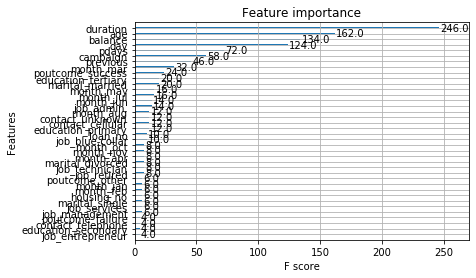

In [29]:
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(XGB_Model)
pyplot.show()

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

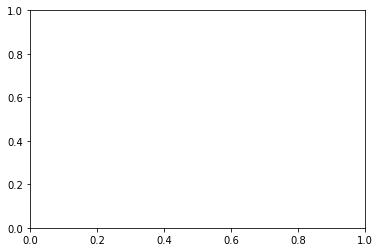

In [36]:
#Tree visualisation (Double tap to zoo)
xgb.plot_tree(XGB_Model, num_trees=2)
fig = plt.gcf()
fig.set_size_inches(150, 300)
fig.savefig('tree.png')

### Let's have a look at the performance of the model on unseen data, we will compare to the random forest confidence predictions

In [31]:
# pip install plot_utils
from plotting_utils import plot_prediction_conf_surface, plot_macest_sklearn_comparison_surface

Your CPU supports instructions that this binary was not compiled to use: AVX2
For maximum performance, you can install NMSLIB from sources 
pip install --no-binary :all: nmslib


In [32]:
from sklearn.calibration import CalibratedClassifierCV

from macest.classification import models as clmod
from macest.classification import plots as clplot

macest_model = clmod.ModelWithConfidence(XGB_Model, X_conf_train, y_conf_train)

macest_model.fit(X_cal, y_cal)

preds = XGB_Model.predict(dtest)
conf_preds = macest_model.predict_proba(dtest)
rf_conf_preds = model.predict_proba(dtest)

TypeError: ('Expecting data to be a DMatrix object, got: ', <class 'pandas.core.frame.DataFrame'>)

In [33]:
macest_point_prediction_conf = macest_model.predict_confidence_of_point_prediction(X_test) 
                              
rf_point_prediction_conf = np.amax(rf_conf_preds, axis=1)

NameError: name 'macest_model' is not defined

In [34]:
clplot.plot_calibration_curve([rf_point_prediction_conf,
                               macest_point_prediction_conf], 
                              ['Random Forest', 'MACE'],
                              preds,
                              y_test)

NameError: name 'rf_point_prediction_conf' is not defined

### Let's compare calibration and forecast metrics

In [ ]:
clplot.plot_calibration_metrics([rf_point_prediction_conf, 
                                macest_point_prediction_conf], 
                              [ 'RF','MACE'], preds, y_test)

In [ ]:
clplot.plot_forecast_metrics([rf_point_prediction_conf, 
                                macest_point_prediction_conf], 
                              [ 'RF','MACE'], preds, y_test)

## What does the surface learnt by the random forest  look like ?

#### As expected it is able to partition the space around the circles, it then extrapolates this surface and predicts anything outside of the inner circle as blue no matter how far we are from the data, this is probably what we want to happen.

#### If we now look at the confidence plot we see that apart from the boundary, between the two circles the random forest is >90% confident. This high confident  is also extrapolated very far from the data, this is probably bad as we have no relevant data 20 standard deviations away from the data

In [ ]:
plot_prediction_conf_surface(3, 25, model, X_pp_train=X_pp_train, plot_training_data=False)

## Let's now compare those confidence estimates with MACEst

#### MACEst also learns to be very confident close to the data, however as we move further away from the data we see that the confidence drops off. At a certain point MACEst will return close an approximately uniform distribution, this suggests that we do not have the relevant data to be confident about the prediction

In [ ]:
plot_macest_sklearn_comparison_surface(3, 25, macest_model, model, X_pp_train=X_pp_train, plot_training_data=True)

In [ ]:
plot_macest_sklearn_comparison_surface(3, 25, macest_model, model, X_pp_train=X_pp_train, plot_training_data=True)